In [2]:
from mt.ct_utils import SegmentationSettings
from mt.scan import Scan

Loading images from:  ../../04_uCT/AC11/Slices/
Loaded stack with shape (694, 176, 1221) and a size of 0.30 GB in 2.84 s.
No _mask file found at: ../../06_Results/AC11/_mask.npy
No _particle_mask file found at: ../../06_Results/AC11/_particle_mask.npy
No _tesselation file found at: ../../06_Results/AC11/_tesselation.npy


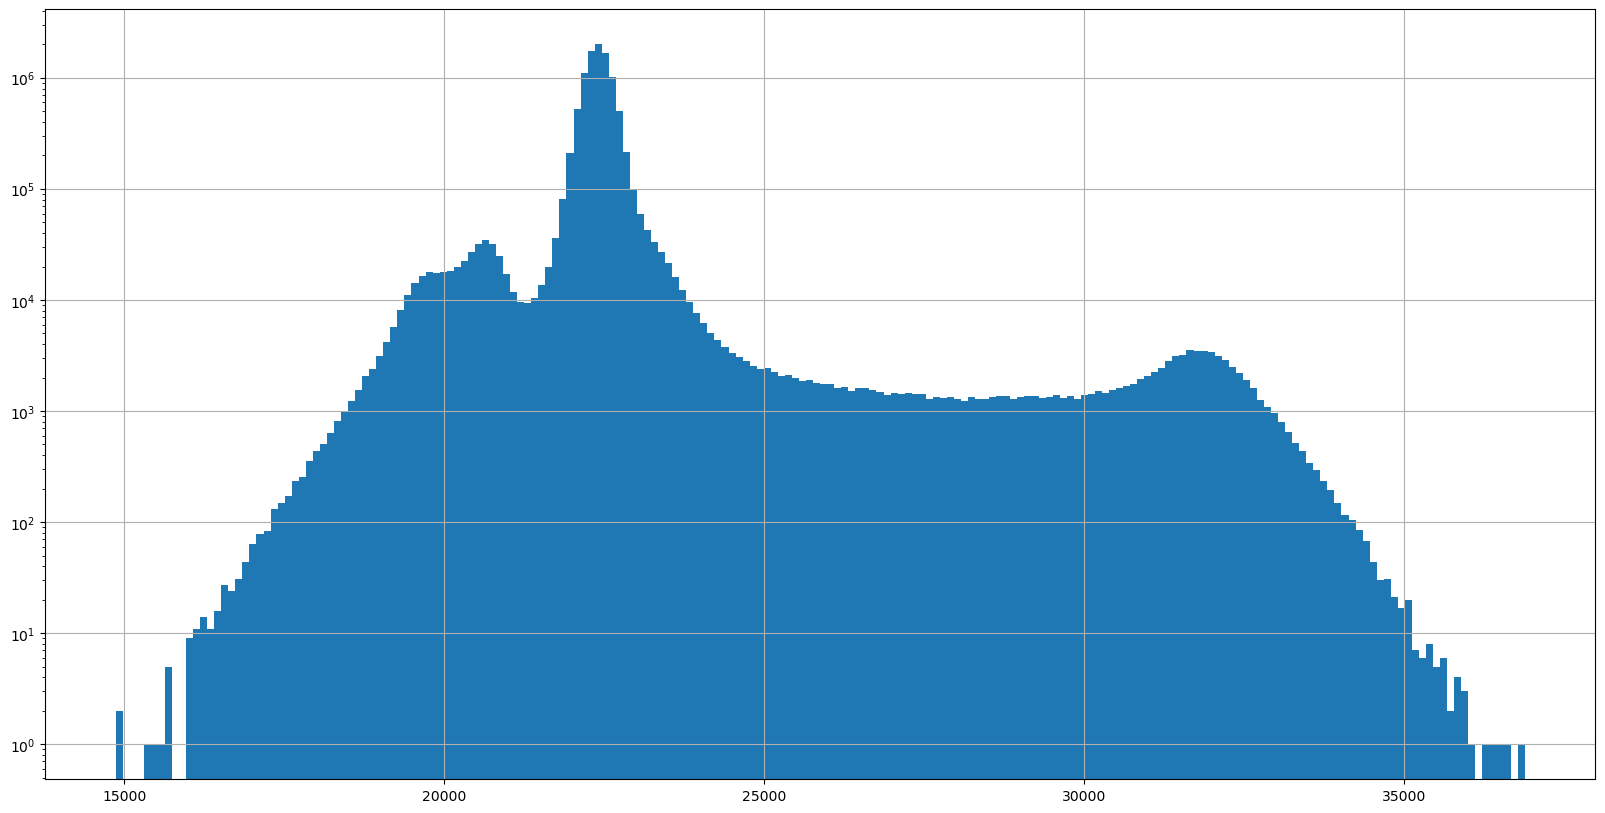

In [11]:
path = "../../04_uCT/AC11/"
scan = Scan(path,
            discard_ends=True,
            downscale=True)
scan.load(logging=True, refresh=True)

scan.show_hist()

scan.try_segmentation_settings(subset_size=-1)
scan.try_segmentation_settings(segment_particles_only=True, subset_size=-1)

In [22]:
print({n:n*2**8 for n in range(50, 150, 10)})

{50: 12800, 60: 15360, 70: 17920, 80: 20480, 90: 23040, 100: 25600, 110: 28160, 120: 30720, 130: 33280, 140: 35840}


In [12]:
particle_settings = SegmentationSettings(particle_mask_sigma=0.8,
                                         particle_n_erosions=1,
                                         particle_enlarge_radius=1)
general_settings = SegmentationSettings(air_mask_sigma=0.6,
                                        air_thresh=85* 2**8,
                                        particle_mask_sigma=0.1,
                                        particle_n_erosions=2,
                                        particle_enlarge_radius=1,
                                        smooth_labels_radius=2)
scan.set_particle_segmentation_settings(particle_settings)
scan.set_segmentation_settings(general_settings)
scan.save()

In [14]:
scan.segment()
scan.voronoi_tesselation()
scan.segment_particles()
scan.show("z")